<a href="https://murmuration-sas.com/" target="_blank">
    <img src="https://murmuration-sas.com/wp-content/uploads/2017/05/Logo-murmuration-vert.png" alt="Murmuration" style="width: 100px" align="right" />
</a>

# Tourism Infrastructure
*OpenStreetMap data requesting*

______________________

<p style="text-align: right"> Tutorial created by - Maël Plantec</p>


#### This notebook shows how to get data from the OSM data librairy using the overpass API. OSM data allows the analysis of tourism infrastructure distribution or any human related node.
https://www.openstreetmap.fr/

#### The documentation to build the perfect request for your project is here : 
#### https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_QL
#### (https://wiki.openstreetmap.org/wiki/Overpass_API/Language_Guide)
#### Go and check it out! There is so much to do. Requesting for specific dates or on several type criteria are only examples.
#### A specific part of the documentation that I recommend you should read, is the part on output formats. It sometimes is better to have JSON outputs but the CSV output allows the filtering of the attributes for more simple results.


#### However in this notebook you will find two already written simple examples.

### Installation and imports:

In [ ]:
!pip install requests
!pip install geopandas
!pip install contextily

In [ ]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx

## Requesting by an ISO code

In [ ]:
# Url for the API
overpass_url = "http://overpass-api.de/api/interpreter"
# Writing the request
overpass_query_france = """
[out:json];
area["ISO3166-1"="FR"][admin_level=2];
(node["tourism"="attraction"](area);
);
out center;
"""
# Searching the results
response_france = requests.get(overpass_url, 
                        params={'data': overpass_query_france})
# Store the results of the query
dataFrance = response_france.json()

In [ ]:
# Check data length (here: the number of tourism infrastructure in France)
len(dataFrance['elements'])

In [ ]:
# Review data format
dataFrance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


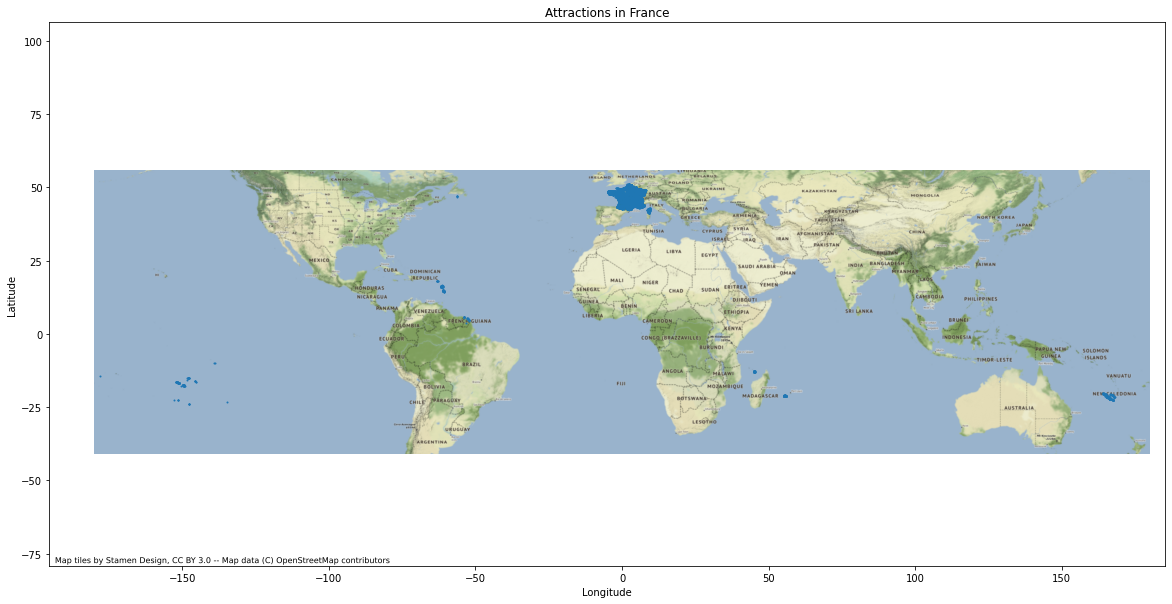

In [10]:
# Collect coords into list
coords = []
for element in dataFrance['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o', markersize=1)
ax = plt.axes()
plt.title('Attractions in France')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
cx.add_basemap(ax, crs="EPSG:4326")
plt.rcParams["figure.figsize"] = (20,10)
plt.show()

## Requesting by a bounding box
You can use:
http://bboxfinder.com
in order to get the bounding box of interest. However, the coordinates used should be lat/lon format (click the bottom right Lat/Lng format).

In [ ]:
# Here we use the coordinates of a box around the region of Bretagne in France.
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query_boundingBox = """
[out:json];
(node["tourism"="attraction"](47.161712,-5.500489,49.019465,-2.512208);
 );
out center;"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query_boundingBox})
dataBretagne = response.json()

In [ ]:
len(dataBretagne['elements'])

In [ ]:
dataBretagne

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


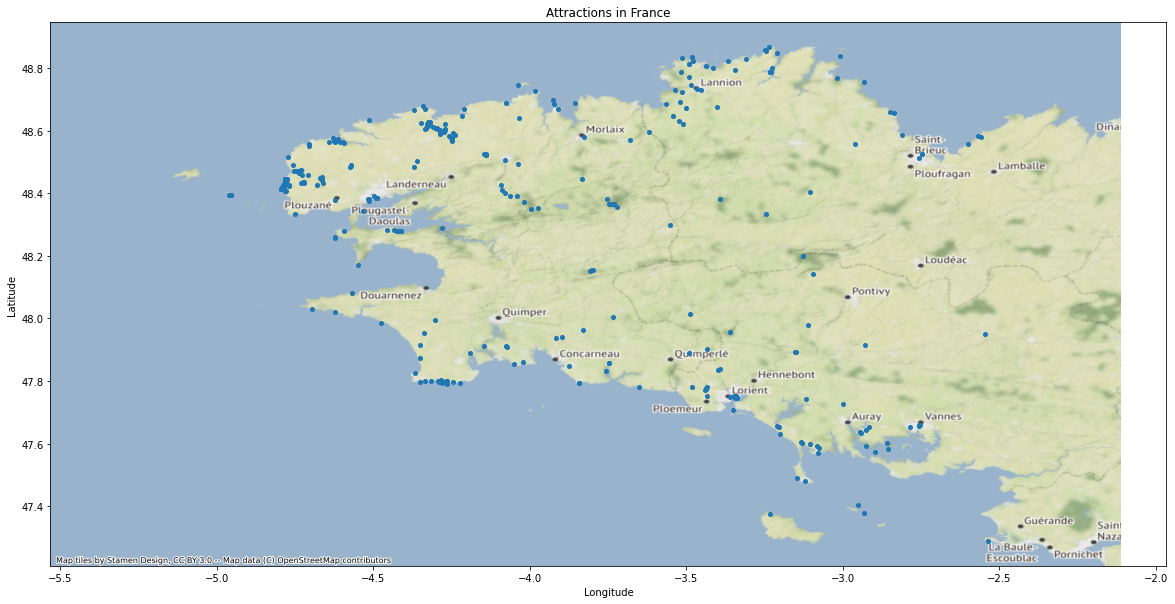

In [9]:
# Collect coords into list
coords = []
for element in dataBretagne['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o', markersize=4)
ax = plt.axes()
plt.title('Attractions in France')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.rcParams["figure.figsize"] = (20,10)
cx.add_basemap(ax, crs="EPSG:4326")
plt.show()